In [1]:
import sys
import os
import glob
import re 
import pandas as pd
import numpy as np
from lxml import etree
import requests
import time
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
sys.path.append(os.path.abspath("C:/Users/calvotello/Dropbox/MTB/Göttingen/research/"))


In [3]:
from librarian_robot import downloading_datasets, map_classications_systems, tokenize, visualize



In [4]:
color = "#669999"

# Read Data

In [5]:
df = pd.read_parquet("./../data/exemplars.parquet")

In [6]:
df

ppn medium                               title  \
ppn                                                                 
309277221    309277221    Aau  Une @saison dans la vie d'Emmanuel   
309277221    309277221    Aau  Une @saison dans la vie d'Emmanuel   
309277221    309277221    Aau  Une @saison dans la vie d'Emmanuel   
1642067407  1642067407    Aau                               Camus   
1734538619  1734538619    Abv                    1 2 3..! Lecture   
...                ...    ...                                 ...   
800133854    800133854    Aau                   Die @kleine Bijou   
800133854    800133854    Aau                   Die @kleine Bijou   
800133250    800133250    Aau                       Bandera negra   
800132432    800132432    Aau          Contra a morte das linguas   
800132432    800132432    Aau          Contra a morte das linguas   

                                          title_supplement  year  \
ppn                                                                
309277221                                            roman  1991   
309277221                                            roman  1991   
309277221                                            roman  1991   
1642067407                                            None  1987   
1734538619                                            None  1982   
...                                                    ...   ...   
800133854                                            Roman  2014   
800133854                                            Roman  2014   
800133250   novell̃a basada en el setge de Cardona de 1711  2014   
800132432                                 o caso do galego  2014   
800132432                                 o caso do galego  2014   

                entry_first author_first_name  author_last_name author_gnd_id  \
ppn                                                                             
309277221     0003:26-01-00      Marie-Claire             Blais     283179058   
309277221     0003:26-01-00      Marie-Claire             Blais     283179058   
309277221     0003:26-01-00      Marie-Claire             Blais     283179058   
1642067407  HDBSRO:13-09-18            Morvan          Lebesque     077112679   
1734538619    2004:02-10-20              None              None          None   
...                     ...               ...               ...           ...   
800133854     KALB:12-11-14           Patrick           Modiano     079561578   
800133854     KALB:12-11-14           Patrick           Modiano     079561578   
800133250     0018:06-11-14             Jordi      Santasusagna     812948734   
800132432     0018:06-11-14            Miguel  Moreira Barbeito          None   
800132432     0018:06-11-14            Miguel  Moreira Barbeito          None   

           editor_first_name  ... GOK_ppn GOK_notation GOK_j  \
ppn                           ...                              
309277221               None  ...    None         None  None   
309277221               None  ...    None         None  None   
309277221               None  ...    None         None  None   
1642067407              None  ...    None         None  None   
1734538619              None  ...    None         None  None   
...                      ...  ...     ...          ...   ...   
800133854              Peter  ...    None         None  None   
800133854              Peter  ...    None         None  None   
800133250               None  ...    None         None  None   
800132432               None  ...    None         None  None   
800132432               None  ...    None         None  None   

                           signatur_place  \
ppn                                         
309277221   MAG|Ha 18-RVK|Ha 18-20|MB 480   
309277221   MAG|Ha 18-RVK|Ha 18-20|MB 480   
309277221   MAG|Ha 18-RVK|Ha 18-20|MB 480   
1642067407                           None   
1734538619                           None   
...                               

In [7]:
", ".join(df.columns.tolist())

'ppn, medium, title, title_supplement, year, entry_first, author_first_name, author_last_name, author_gnd_id, editor_first_name, editor_last_name, editor_gnd_id, isbn, ILNs, content_type, publisher, language_text, language_original, pages, format, comment_isbn, place_publication, summary, title_continuing_resource, work_ppn, work_info, work_title, expression_ppn, expression_info, expression_title, DDC_notation, DDC_sachgruppe, DDC_grundnotation, BK_ppn, BK_notation, BK_j, RVK_ppn, RVK_notation, RVK_j, RVK_k, keyword_RSWK, keyword_K10plus, keyword_project, keyword_local, keyword_045D, keyword_LoC, lcc_notation, klassifikationssystem_system, klassifikationssystem_notation, uri_description, uri, GOK_ppn, GOK_notation, GOK_j, signatur_place, signatur, signatur_date, Abrufzeichen, query, year_publication, ILNs_libraries'

In [8]:
df.shape

(1094658, 61)

In [9]:
sorted(df.year_publication.unique())


[1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019]

In [10]:
df.fillna(value=np.nan, inplace=True)


In [11]:
df

ppn medium                               title  \
ppn                                                                 
309277221    309277221    Aau  Une @saison dans la vie d'Emmanuel   
309277221    309277221    Aau  Une @saison dans la vie d'Emmanuel   
309277221    309277221    Aau  Une @saison dans la vie d'Emmanuel   
1642067407  1642067407    Aau                               Camus   
1734538619  1734538619    Abv                    1 2 3..! Lecture   
...                ...    ...                                 ...   
800133854    800133854    Aau                   Die @kleine Bijou   
800133854    800133854    Aau                   Die @kleine Bijou   
800133250    800133250    Aau                       Bandera negra   
800132432    800132432    Aau          Contra a morte das linguas   
800132432    800132432    Aau          Contra a morte das linguas   

                                          title_supplement  year  \
ppn                                                                
309277221                                            roman  1991   
309277221                                            roman  1991   
309277221                                            roman  1991   
1642067407                                             NaN  1987   
1734538619                                             NaN  1982   
...                                                    ...   ...   
800133854                                            Roman  2014   
800133854                                            Roman  2014   
800133250   novell̃a basada en el setge de Cardona de 1711  2014   
800132432                                 o caso do galego  2014   
800132432                                 o caso do galego  2014   

                entry_first author_first_name  author_last_name author_gnd_id  \
ppn                                                                             
309277221     0003:26-01-00      Marie-Claire             Blais     283179058   
309277221     0003:26-01-00      Marie-Claire             Blais     283179058   
309277221     0003:26-01-00      Marie-Claire             Blais     283179058   
1642067407  HDBSRO:13-09-18            Morvan          Lebesque     077112679   
1734538619    2004:02-10-20               NaN               NaN           NaN   
...                     ...               ...               ...           ...   
800133854     KALB:12-11-14           Patrick           Modiano     079561578   
800133854     KALB:12-11-14           Patrick           Modiano     079561578   
800133250     0018:06-11-14             Jordi      Santasusagna     812948734   
800132432     0018:06-11-14            Miguel  Moreira Barbeito           NaN   
800132432     0018:06-11-14            Miguel  Moreira Barbeito           NaN   

           editor_first_name  ... GOK_ppn GOK_notation GOK_j  \
ppn                           ...                              
309277221                NaN  ...     NaN          NaN   NaN   
309277221                NaN  ...     NaN          NaN   NaN   
309277221                NaN  ...     NaN          NaN   NaN   
1642067407               NaN  ...     NaN          NaN   NaN   
1734538619               NaN  ...     NaN          NaN   NaN   
...                      ...  ...     ...          ...   ...   
800133854              Peter  ...     NaN          NaN   NaN   
800133854              Peter  ...     NaN          NaN   NaN   
800133250                NaN  ...     NaN          NaN   NaN   
800132432                NaN  ...     NaN          NaN   NaN   
800132432                NaN  ...     NaN          NaN   NaN   

                           signatur_place  \
ppn                                         
309277221   MAG|Ha 18-RVK|Ha 18-20|MB 480   
309277221   MAG|Ha 18-RVK|Ha 18-20|MB 480   
309277221   MAG|Ha 18-RVK|Ha 18-20|MB 480   
1642067407                            NaN   
1734538619                            NaN   
...                               

# Describe Data

## Completeness of the Fields


In [12]:
df.notna().sum().div(df.shape[0]).sort_values()

work_info           0.000000
keyword_project     0.000000
uri                 0.000000
expression_info     0.000000
expression_title    0.000003
                      ...   
year                1.000000
medium              1.000000
query               1.000000
year_publication    1.000000
ppn                 1.000000
Length: 61, dtype: float64

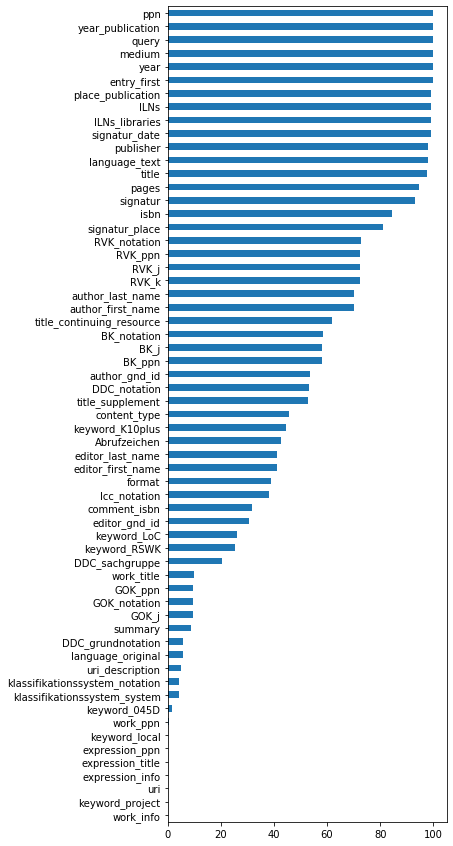

In [13]:

(df.notna().sum().div(df.shape[0])*100).sort_values().plot.barh(figsize=(5,15))


In [14]:
selected_columns = ['ppn',
 'medium',
 'title',
 'title_supplement',
 'year',
 'entry_first',
 'author_last_name',
 'editor_last_name',
 'isbn',
 'ILNs',
 'content_type',
 'publisher',
 'language_text',
 'language_original',
 'pages',
 'format',
 'comment_isbn',
 'place_publication',
 'summary',
 'title_continuing_resource',
 'work_title',
 'expression_title',
 'DDC_notation',
 'BK_notation',
 'RVK_notation',
 'keyword_RSWK',
 'keyword_K10plus',
 'keyword_project',
 'keyword_local',
 'keyword_045D',
 'keyword_LoC',
 'lcc_notation',
 'uri',
 'GOK_notation'
]

In [15]:
visualize.plot_bar_not_nas

<function librarian_robot.visualize.plot_bar_not_nas(df, figsize=(5, 10), title='', color='#669999', xlabel='', ylabel='', outdir='./../visualizations/', figure_name='bat_plot_not_na')>

C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:90: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


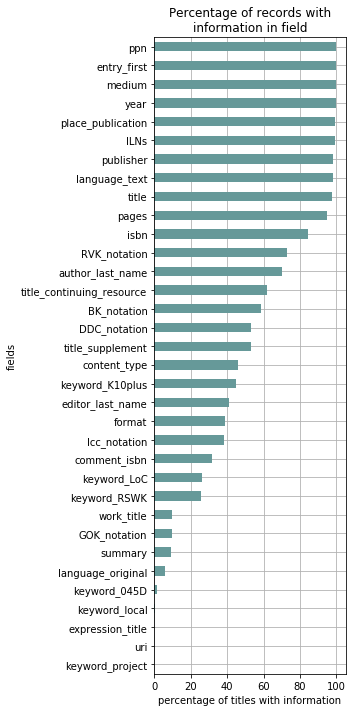

In [16]:
visualize.plot_bar_not_nas(df[selected_columns], title = "Percentage of records with\ninformation in field", xlabel = "percentage of titles with information", ylabel = "fields", figure_name = "percentage_titles_fields")

## Chronological Distribution

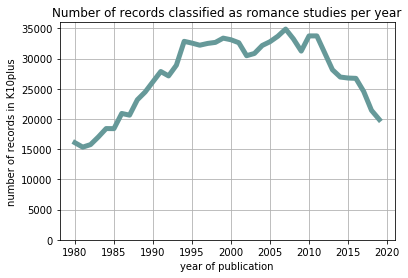

In [18]:
visualize.plot_line_year_value_counts(df["year_publication"], title = "Number of records classified as romance studies per year", xlabel= "year of publication", ylabel= "number of records in K10plus", figure_name = "number_records_years", ylim = (0,36000))

(0, 35000)

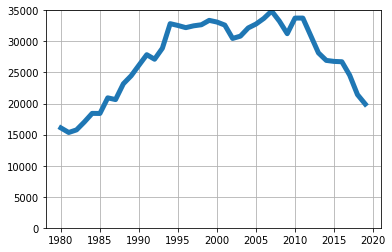

In [18]:
ax = df["year_publication"].value_counts().sort_index().plot.line(linewidth = 5, grid= True)
ax.set_ylim(0,35000)


## Year of Publication against Year of Entry in the Catalogue

In [25]:
df["entry_first_date"] = pd.to_datetime(df["entry_first"].str[-8:])

In [26]:
df["entry_first_date_year"] = df["entry_first_date"].dt.year

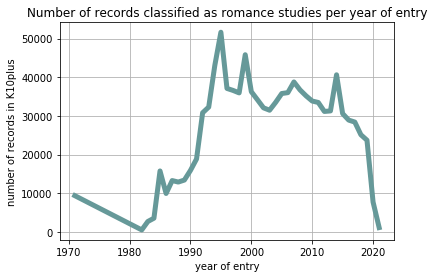

In [27]:
visualize.plot_line_year_value_counts(df["entry_first_date_year"], title = "Number of records classified as romance studies per year of entry", xlabel= "year of entry", ylabel= "number of records in K10plus", figure_name = "number_records_years_entry")

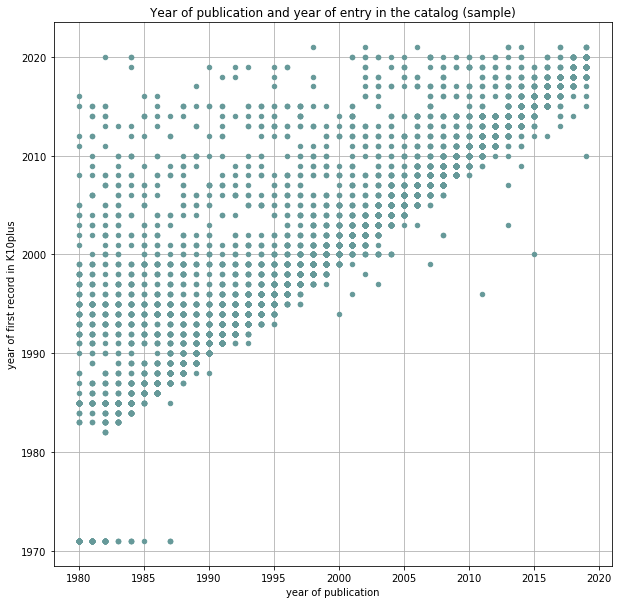

In [28]:
ax = df.sample(10000, random_state=2021).plot.scatter("year_publication", "entry_first_date_year", figsize=(10,10), grid=True, color =color, title ="Year of publication and year of entry in the catalog (sample)")
ax.set_axisbelow(True)

ax.set_xlabel("year of publication")
ax.set_ylabel("year of first record in K10plus")
fig = ax.get_figure()
fig.savefig("./../visualizations/scatter_year_publication_year_entry_catalog.png")

In [29]:
Q1 = df.sample(10000, random_state=2021).groupby("year_publication")["entry_first_date_year"].quantile(0.25)
Q3 = df.sample(10000, random_state=2021).groupby("year_publication")["entry_first_date_year"].quantile(0.75)

IQR = Q3 - Q1
IQR.mean()


3.0

In [30]:
IQR

year_publication
1980    11.5
1981    10.0
1982    11.0
1983    10.0
1984    10.0
1985     8.0
1986     8.0
1987     6.0
1988     6.0
1989     4.0
1990     3.0
1991     3.0
1992     3.0
1993     2.0
1994     2.0
1995     1.0
1996     1.5
1997     2.0
1998     1.0
1999     1.0
2000     1.0
2001     1.0
2002     1.0
2003     1.0
2004     1.0
2005     1.0
2006     1.0
2007     1.0
2008     1.0
2009     1.0
2010     1.0
2011     1.0
2012     1.0
2013     1.0
2014     1.0
2015     0.0
2016     0.0
2017     0.0
2018     0.0
2019     1.0
Name: entry_first_date_year, dtype: float64

In [31]:
IQR.mean()

3.0

In [32]:
Q05 = df.groupby("year_publication")["entry_first_date_year"].quantile(0.05)
Q95 = df.groupby("year_publication")["entry_first_date_year"].quantile(0.95)

iqr90 = Q95 - Q05
iqr90_df = pd.DataFrame(iqr90)

iqr90_df

entry_first_date_year
year_publication                       
1980                               36.0
1981                               36.0
1982                               35.0
1983                               23.0
1984                               22.0
1985                               21.0
1986                               19.0
1987                               17.0
1988                               17.0
1989                               17.0
1990                               16.0
1991                               15.0
1992                               13.0
1993                               13.0
1994                               12.0
1995                               11.0
1996                               10.0
1997                               10.0
1998                                9.0
1999                                9.0
2000                                9.0
2001                                9.0
2002                               10.0
2003                                9.0
2004                                9.0
2005                                7.0
2006                                7.0
2007                                6.0
2008                                7.0
2009                                6.0
2010                                6.0
2011                                4.0
2012                                4.0
2013                                4.0
2014                                3.0
2015                                3.0
2016                                3.0
2017                                3.0
2018                                2.0
2019                                2.0

In [33]:
iqr90_df

entry_first_date_year
year_publication                       
1980                               36.0
1981                               36.0
1982                               35.0
1983                               23.0
1984                               22.0
1985                               21.0
1986                               19.0
1987                               17.0
1988                               17.0
1989                               17.0
1990                               16.0
1991                               15.0
1992                               13.0
1993                               13.0
1994                               12.0
1995                               11.0
1996                               10.0
1997                               10.0
1998                                9.0
1999                                9.0
2000                                9.0
2001                                9.0
2002                               10.0
2003                                9.0
2004                                9.0
2005                                7.0
2006                                7.0
2007                                6.0
2008                                7.0
2009                                6.0
2010                                6.0
2011                                4.0
2012                                4.0
2013                                4.0
2014                                3.0
2015                                3.0
2016                                3.0
2017                                3.0
2018                                2.0
2019                                2.0

In [34]:
iqr90_df.mean()

entry_first_date_year    11.85
dtype: float64

In [35]:
iqr90_df.iloc[25:35].mean()

entry_first_date_year    5.4
dtype: float64

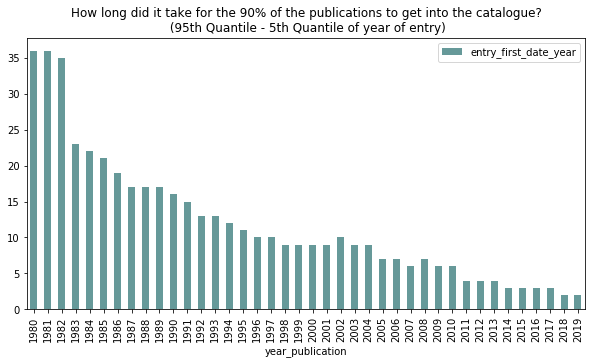

In [36]:
iqr90_df.plot.bar(figsize=(10,5), title ="How long did it take for the 90% of the publications to get into the catalogue?\n (95th Quantile - 5th Quantile of year of entry)", color = color)

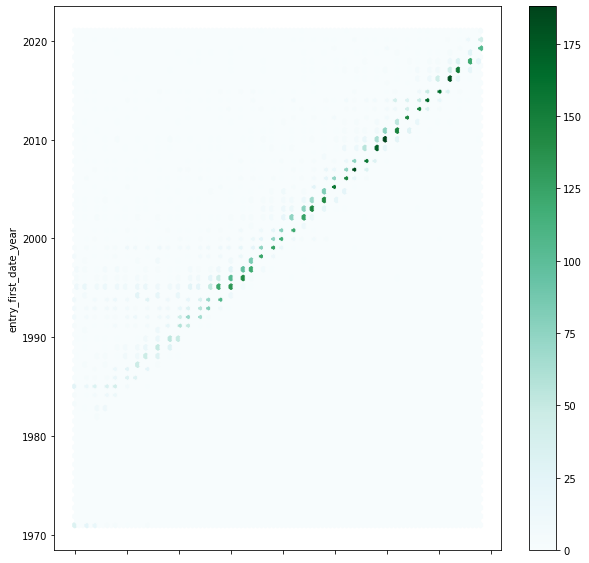

In [37]:
df.sample(10000, random_state=2021).plot.hexbin("year_publication", "entry_first_date_year", figsize=(10,10))

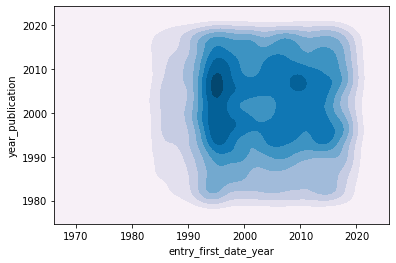

In [38]:
sns.kdeplot(df.sample(10000, random_state=2021)['entry_first_date_year'], df.sample(10000)['year_publication'], shade=True, cmap='PuBu')

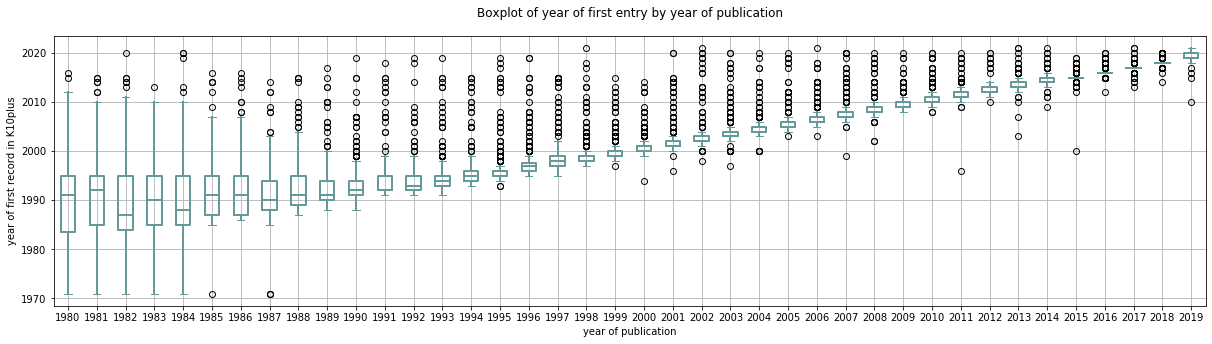

In [39]:
visualize.plot_boxplots_by(df.sample(10000, random_state=2021), column_to_plot = "entry_first_date_year", column_by = "year_publication", xlabel= "year of publication", ylabel= "year of first record in K10plus",
title = "Boxplot of year of first entry by year of publication",
figure_name = "boxplot_year_publication_year_entry_catalog")